In [338]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors, datasets
from numpy import array
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Exercise 1
Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.

In [238]:
from sklearn.datasets import load_iris

In [239]:
flowers = datasets.load_iris()

In [240]:
flowers.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [241]:
flowers.target[1]

0

In [242]:
x = flowers.data
y = flowers.target

In [243]:
x[2]

array([4.7, 3.2, 1.3, 0.2])

Split dataset into train and test data

In [244]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234, stratify=y)

In [270]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [245]:
#1
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
n_neighbors = 25
nearest = KNeighborsClassifier(n_neighbors=n_neighbors)
nearest.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [246]:
nearest.score(x_test, y_test)

0.9555555555555556

In [247]:
#2
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
n_neighbors = 5
nearest = KNeighborsClassifier(n_neighbors=n_neighbors)
nearest.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [248]:
nearest.score(x_test, y_test)

0.9777777777777777

In [249]:
#3
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
n_neighbors = 15
nearest = KNeighborsClassifier(n_neighbors=n_neighbors)
nearest.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [250]:
nearest.score(x_test, y_test)

0.9555555555555556

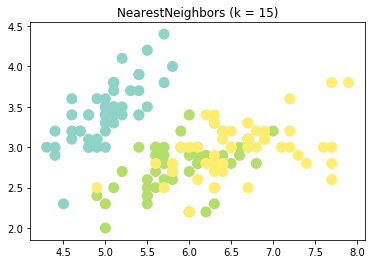

In [252]:
plt.scatter(x[:,0],x[:,1], marker='o', s=100, c=y, cmap=plt.cm.Set3,)
plt.title("NearestNeighbors (k = %i)"% (n_neighbors))
plt.show()

# Exercise 2
Perform three-fold cross-validation using the ``KFold`` class on the iris dataset without shuffling the data. Can you explain the result?

#Shuffle the dataset randomly - miss this step

rng = np.random.RandomState(0)

permutation = rng.permutation(len(x))

x_kf, y_kf = x[permutation], y[permutation]

In [328]:
x_kf = flowers.data
y_kf = flowers.target

In [329]:
#Split the dataset into folders (k-groups)

In [441]:
kf = KFold(n_splits=3) #KFold(n_splits=3, random_state=None, shuffle=False)
kf.get_n_splits(x_kf)
rf_reg = RandomForestRegressor() #instead of classifier() in the example
print(kf)

KFold(n_splits=3, random_state=None, shuffle=False)


In [442]:
scores_kf = []
for train, test in kf.split(x_kf):
    print("Train Index: ", train, "\n")
    print("Test Index: ", test)
    x_kf_train, x_kf_test = x_kf[train], x_kf[test]
    y_kf_train, y_kf_test = y_kf[train], y_kf[test]
    model = rf_reg.fit(x_kf_train,y_kf_train)
    predictions = rf_reg.predict(x_kf_test)
    scores_kf.append(model.score(x_kf_test,y_kf_test))

Train Index:  [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 14

/Users/ekaterinastaroverova/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [443]:
scores_kf

[0.0, 0.0, 0.0]

In [444]:
print('Scores from each Iteration: ', scores_kf)
print('Average K-Fold Score :' , np.mean(scores_kf))

Scores from each Iteration:  [0.0, 0.0, 0.0]
Average K-Fold Score : 0.0


СONCLUSION

According KV-Fold cross-validation, data must be splitted randomly and evenly (this is why we use permutations befor splitting). In addittion, this procedure establishes training set (based on K-1 part of given data-set) known as candidat model. Prediction precision of this model is estimated on other sets (parts of given data-set). 

Consequently, choosing candidat model is the most importent part of CV. Hovewer in our case we have refused rearrange data. Let's consider results:

np.mean(scores) = 0.0 determain accuracy of prediction (we have several data-sets, so we need mean). Interesting that with shuffle the dataset randomly it is 0.95. In other words, without permutations our CV does mot work due to absolutely different chunks of data. 


# Exercise 2
Given the following arrays of "true" class labels and predicted class labels.

Can you implement a function that uses the accuracy measure to compute the average-per-class accuracy as shown below?

In [437]:
y_true = np.array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2])
y_pred = np.array([0, 1, 1, 0, 1, 1, 2, 2, 2, 2])

cmat = confusion_matrix(y_true, y_pred)

In [433]:
#lets start from accuracy
#Accuracy is calculated as the total number of two correct predictions 
#(TP + TN) divided by the total number of a dataset (P + N).

def accuracy(x,y):
    result = [p for p in zip(x, y)]
    true_list=[]
    for i in result:
        if i[0] == i[1]:
            true_list.append(i)
    return len(true_list)/len(x)

In [434]:
accuracy(y_pred, y_true)

0.5

In [435]:
#Check it
from sklearn.metrics import accuracy_score

In [436]:
accuracy_score(y_pred, y_true)

0.5

In [439]:
#Average-per-class accuracy
def apc_accuracy(x):
    result = x.diagonal()/x.sum(axis=1)
    return result

In [440]:
apc_accuracy(cmat)

array([0.33333333, 0.4       , 1.        ])